# Generate Fake Data for WFH Data

In [8]:
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;sns.set();

from sklearn import tree

## Create a model for the data

In [102]:
feature_names = ['health', 'weather', 'holiday']

In [120]:
class WFH:
    def __init__(self, d, n, probabilities=None):
        if probabilities is None:
            probabilities = (0.8, 0.2)
        self.probabilities = probabilities
        self.d = d
        self.n = n
        self.x = self._generate_binary_features()
        self.y = self._generate_target_values()
        
    def _generate_binary_features(self):
    
        feat = np.random.choice([0,1], (self.n, self.d)).tolist()
    
        return feat

    def _desired_y(self):

        y = []
        for i in self.x:
            if i == [1,1,0]:
                y.append(1)
            else:
                y.append(0)
        
        return y
    
    @staticmethod
    def _randomize_y(y, probabilities):
        
        first_val = y
        second_val = 1 if y == 0 else 0
        
        return np.random.choice([first_val, second_val], 1, p=probabilities)[0]
    
    def _generate_target_values(self):
        
        y = self._desired_y()
        y = [self._randomize_y(i, self.probabilities) for i in y]
        
        return y

## Generate Data

In [128]:
wfh = WFH(d=3, n=100, probabilities=(1,0))

In [137]:

df = pd.merge(
    pd.DataFrame(wfh.x, columns=feature_names), 
    pd.DataFrame(wfh.y, columns=['go_to_office']),
    how='left',
    left_index=True,
    right_index=True
)

In [138]:
print(
    df.sample(10).to_markdown()
)

|    |   health |   weather |   holiday |   go_to_office |
|---:|---------:|----------:|----------:|---------------:|
|  7 |        1 |         1 |         0 |              1 |
| 78 |        0 |         1 |         0 |              0 |
| 89 |        1 |         1 |         1 |              0 |
|  0 |        0 |         0 |         1 |              0 |
| 77 |        1 |         1 |         0 |              1 |
| 61 |        0 |         1 |         0 |              0 |
| 64 |        0 |         1 |         0 |              0 |
| 92 |        0 |         1 |         1 |              0 |
|  9 |        0 |         0 |         1 |              0 |
| 49 |        1 |         0 |         1 |              0 |


## Decision Tree

In [132]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(wfh.x, wfh.y)

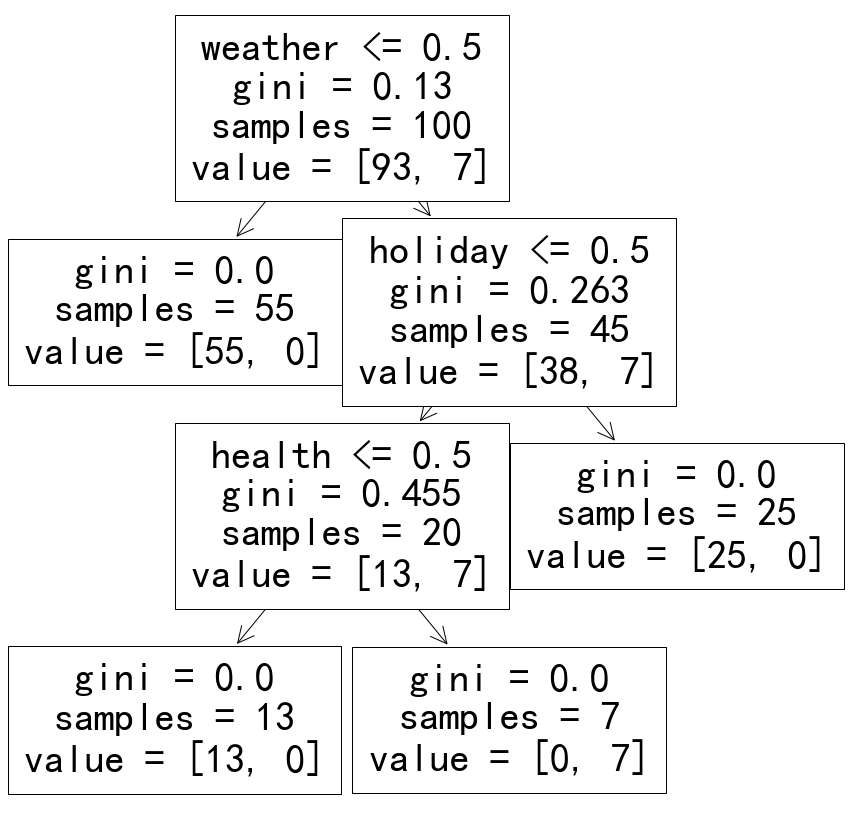

In [144]:
fig, ax=plt.subplots(figsize=(15,15))
tree.plot_tree(clf, feature_names=feature_names);

## Impure Data

In [140]:
wfh_impure = WFH(d=3, n=100, probabilities=(0.9,0.1))

In [153]:
clf_impure = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=0.0001)
clf_impure = clf_impure.fit(wfh_impure.x, wfh_impure.y)

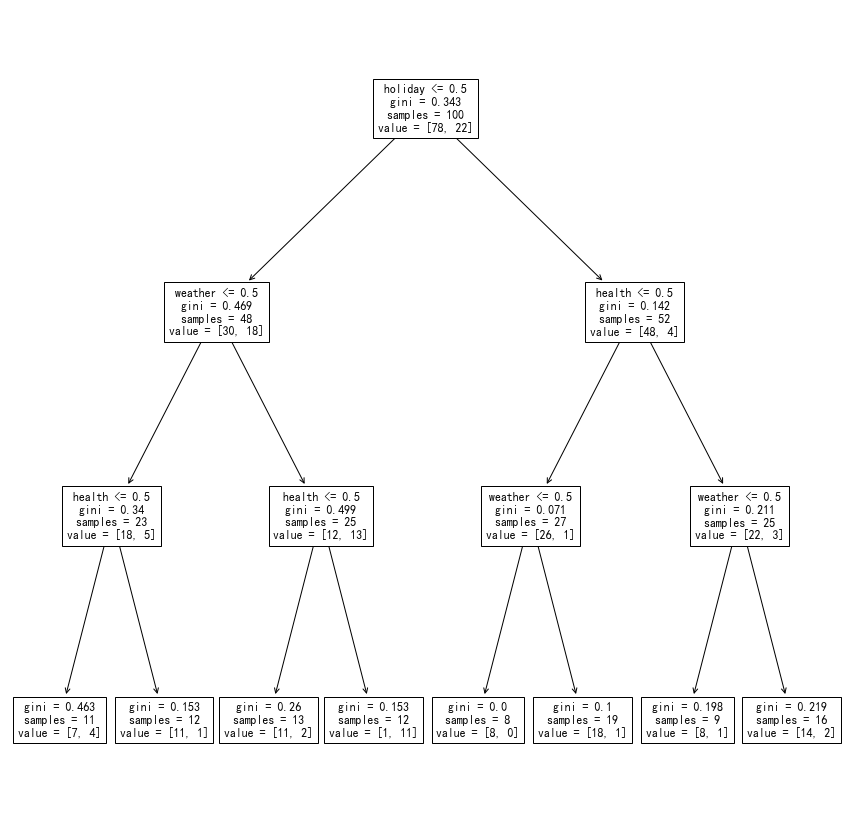

In [154]:
fig, ax = plt.subplots(figsize=(15,15))
tree.plot_tree(clf_impure, feature_names=feature_names);

## Gini Impurity

### Gini Impurity for 2 possible classes

In [234]:
def gini_2(p1, p2):
    if p1+p2<=1:
        return p1 * (1 - p1) + p2 * (1 - p2)
    else:
        return None
    

In [249]:
gini_2_test_p1 = np.linspace(0,1,1001)
gini_2_test_p2 = np.linspace(0,1,1001)

gini_2_test_impurity = [
    [gini_2(p1, p2) for p1 in gini_2_test_p1]
    for p2 in gini_2_test_p2
]

In [250]:
df_gini_2_test = pd.DataFrame(
    gini_2_test_impurity,
    index=[f"{i:0.2f}" for i in gini_2_test_p2],
    columns=[f"{i:0.2f}" for i in gini_2_test_p1]
)


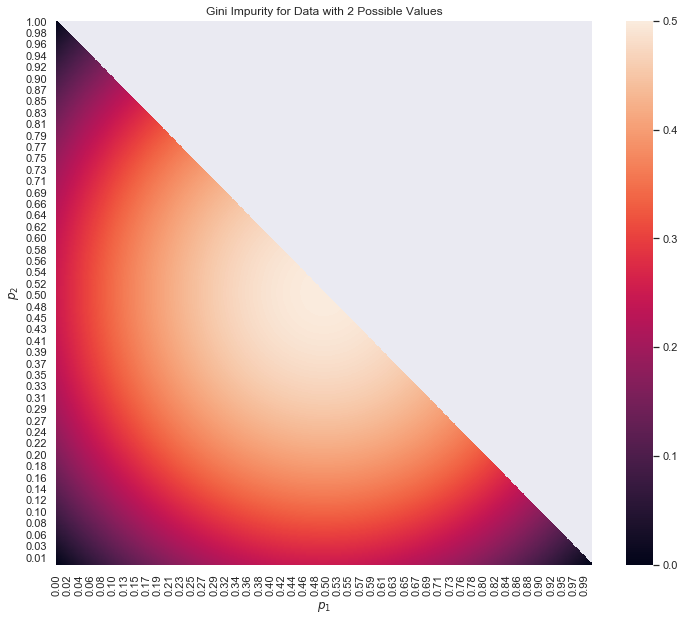

In [251]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(
    df_gini_2_test.loc[::-1,], ax=ax
)
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_title('Gini Impurity for Data with 2 Possible Values');

### Gini Impurity for 3 possible classes

In [230]:
def gini_3(p1,p2):
    # return -2 * (p1**2 + p2**2 + p1*p2 - p1 - p2)
    if p1+p2<=1:
        return p1 * (1 - p1) + p2 * (1 - p2) + (1 - p1 - p2) * (p1 + p2)
    else:
        return None

In [252]:
gini_3_test_p1 = np.linspace(0,1,1001)
gini_3_test_p2 = np.linspace(0,1,1001)
gini_3_test_impurity = [
    [gini_3(p1, p2) for p1 in gini_3_test_p1]
    for p2 in gini_3_test_p2
]

In [253]:
df_gini_3_test = pd.DataFrame(
    gini_3_test_impurity,
    index=[f"{i:0.2f}" for i in gini_3_test_p2],
    columns=[f"{i:0.2f}" for i in gini_3_test_p1]
)


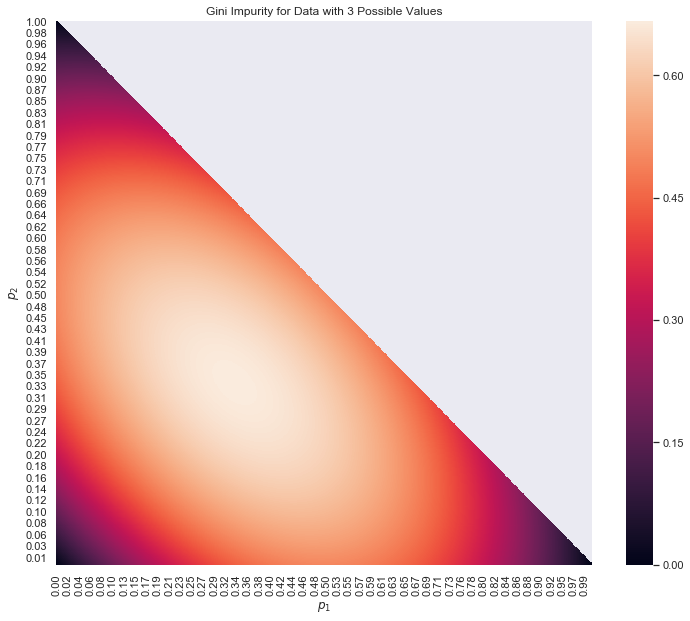

In [254]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(
    df_gini_3_test.loc[::-1,], ax=ax
)
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_title('Gini Impurity for Data with 3 Possible Values');

## Plotlyjs

```
charts:
  - target: 3-possible-classes
    data: "[
      {
        z: [[0.0, 0.0392, 0.0768, 0.11279999999999998, 0.1472, 0.18000000000000002, 0.2112, 0.24080000000000001, 0.2688, 0.2952, 0.32000000000000006, 0.3432, 0.3648, 0.38480000000000003, 0.4032, 0.42, 0.4352, 0.4488, 0.4608, 0.4712, 0.48, 0.4872, 0.49280000000000007, 0.4968000000000001, 0.4992, 0.5, 0.4992, 0.4968, 0.49279999999999996, 0.4872, 0.48, 0.4712, 0.4608, 0.4488, 0.4352, 0.41999999999999993, 0.4032, 0.38480000000000003, 0.3648, 0.34319999999999995, 0.31999999999999995, 0.2951999999999999, 0.26880000000000004, 0.24080000000000001, 0.2112, 0.17999999999999997, 0.14719999999999994, 0.1127999999999999, 0.07680000000000006, 0.03920000000000003, 0.0], [0.0392, 0.0776, 0.11439999999999999, 0.14959999999999998, 0.18320000000000003, 0.2152, 0.24559999999999998, 0.2744, 0.3016, 0.32720000000000005, 0.35120000000000007, 0.37360000000000004, 0.39440000000000003, 0.4136, 0.4312, 0.4472, 0.4616, 0.4744, 0.48560000000000003, 0.4952, 0.5032, 0.5096, 0.5144000000000001, 0.5176000000000001, 0.5192, 0.5192, 0.5176000000000001, 0.5144, 0.5095999999999999, 0.5032, 0.4952, 0.4856, 0.4744, 0.4616, 0.44719999999999993, 0.4311999999999999, 0.4136, 0.39440000000000003, 0.37360000000000004, 0.35119999999999996, 0.32719999999999994, 0.3015999999999999, 0.2744000000000001, 0.24560000000000004, 0.2152, 0.18319999999999997, 0.14959999999999996, 0.11439999999999989, 0.07760000000000006, 0.039200000000000026, null], [0.0768, 0.11439999999999999, 0.15039999999999998, 0.1848, 0.2176, 0.24880000000000002, 0.2784, 0.3064, 0.3328, 0.35760000000000003, 0.3808, 0.4024, 0.4224, 0.44079999999999997, 0.4576, 0.47279999999999994, 0.48639999999999994, 0.49839999999999995, 0.5087999999999999, 0.5176000000000001, 0.5247999999999999, 0.5304, 0.5344, 0.5368, 0.5376, 0.5368, 0.5344, 0.5304, 0.5248, 0.5176000000000001, 0.5088, 0.49840000000000007, 0.4864, 0.4728, 0.4576, 0.44079999999999997, 0.4224, 0.4024, 0.3808, 0.3575999999999999, 0.33279999999999993, 0.3063999999999999, 0.27840000000000004, 0.24880000000000002, 0.2176, 0.18479999999999996, 0.15039999999999992, 0.11439999999999989, 0.07680000000000006, null, null], [0.11279999999999998, 0.14959999999999998, 0.1848, 0.21839999999999998, 0.2504, 0.28080000000000005, 0.3096, 0.33680000000000004, 0.36239999999999994, 0.3864, 0.40880000000000005, 0.4296, 0.4488, 0.46640000000000004, 0.4824, 0.4967999999999999, 0.5095999999999999, 0.5207999999999999, 0.5304, 0.5384, 0.5448000000000001, 0.5496, 0.5528, 0.5544, 0.5544, 0.5528000000000001, 0.5496, 0.5448000000000001, 0.5384, 0.5304, 0.5207999999999999, 0.5095999999999999, 0.4968, 0.48239999999999994, 0.4663999999999999, 0.4487999999999999, 0.42960000000000004, 0.40880000000000005, 0.3864, 0.36239999999999994, 0.3368, 0.30959999999999993, 0.28080000000000005, 0.2504, 0.21839999999999998, 0.18479999999999996, 0.1495999999999999, 0.11279999999999989, null, null, null], [0.1472, 0.18320000000000003, 0.2176, 0.2504, 0.2816, 0.31120000000000003, 0.33920000000000006, 0.36560000000000004, 0.39039999999999997, 0.4136000000000001, 0.43520000000000003, 0.45520000000000005, 0.4736, 0.49040000000000006, 0.5056, 0.5192, 0.5312, 0.5416, 0.5504, 0.5576000000000001, 0.5632, 0.5672000000000001, 0.5696000000000001, 0.5704000000000001, 0.5696, 0.5671999999999999, 0.5631999999999999, 0.5576, 0.5503999999999999, 0.5416000000000001, 0.5312, 0.5192, 0.5055999999999999, 0.49039999999999995, 0.47359999999999997, 0.45519999999999994, 0.43520000000000003, 0.41359999999999997, 0.39039999999999997, 0.3655999999999999, 0.33919999999999995, 0.3111999999999999, 0.2816000000000001, 0.2504, 0.2176, 0.18319999999999995, 0.14719999999999994, null, null, null, null], [0.18000000000000002, 0.2152, 0.24880000000000002, 0.2808, 0.31120000000000003, 0.3400000000000001, 0.36719999999999997, 0.39280000000000004, 0.4168, 0.43920000000000003, 0.4600000000000001, 0.4792, 0.4968, 0.5128, 0.5272, 0.54, 0.5512, 0.5608, 0.5688, 0.5751999999999999, 0.5800000000000001, 0.5832, 0.5848000000000001, 0.5848000000000001, 0.5832, 0.5800000000000001, 0.5752, 0.5688, 0.5608, 0.5512, 0.54, 0.5272, 0.5128, 0.4968, 0.47919999999999996, 0.45999999999999996, 0.43920000000000003, 0.41680000000000006, 0.39280000000000004, 0.36719999999999997, 0.33999999999999997, 0.3111999999999999, 0.28080000000000005, 0.24880000000000002, 0.21519999999999997, 0.17999999999999997, null, null, null, null, null], [0.2112, 0.24559999999999998, 0.2784, 0.3096, 0.33920000000000006, 0.36719999999999997, 0.3936, 0.4184, 0.4416, 0.4632, 0.4832000000000001, 0.5016, 0.5184, 0.5336000000000001, 0.5472, 0.5591999999999999, 0.5696, 0.5783999999999999, 0.5855999999999999, 0.5912, 0.5952, 0.5976000000000001, 0.5984, 0.5976000000000001, 0.5952, 0.5912000000000001, 0.5855999999999999, 0.5784, 0.5696, 0.5592, 0.5472, 0.5336000000000001, 0.5184, 0.5015999999999999, 0.48319999999999996, 0.46319999999999995, 0.44160000000000005, 0.41840000000000005, 0.39360000000000006, 0.36719999999999997, 0.33919999999999995, 0.30959999999999993, 0.27840000000000004, 0.2456, 0.2112, null, null, null, null, null, null], [0.24080000000000001, 0.2744, 0.3064, 0.3368, 0.36560000000000004, 0.39280000000000004, 0.4184, 0.4424, 0.46480000000000005, 0.48560000000000003, 0.5048, 0.5224, 0.5384, 0.5528, 0.5656, 0.5768, 0.5863999999999999, 0.5944, 0.6008, 0.6055999999999999, 0.6088, 0.6104, 0.6104, 0.6088, 0.6056, 0.6008, 0.5944, 0.5864, 0.5768, 0.5656, 0.5528, 0.5384, 0.5224, 0.5047999999999999, 0.4855999999999999, 0.4647999999999999, 0.4424, 0.4184, 0.3928, 0.3655999999999999, 0.33679999999999993, 0.3063999999999999, 0.27440000000000003, 0.24080000000000001, null, null, null, null, null, null, null], [0.2688, 0.3016, 0.3328, 0.36239999999999994, 0.39039999999999997, 0.4168, 0.4416, 0.46480000000000005, 0.48639999999999994, 0.5064, 0.5247999999999999, 0.5416, 0.5568, 0.5704, 0.5824, 0.5928, 0.6015999999999999, 0.6088, 0.6144000000000001, 0.6184000000000001, 0.6207999999999999, 0.6216, 0.6208, 0.6184000000000001, 0.6144000000000001, 0.6088, 0.6016, 0.5928, 0.5823999999999999, 0.5704, 0.5568, 0.5416, 0.5248, 0.5064, 0.48639999999999994, 0.4647999999999999, 0.4416, 0.4168, 0.39039999999999997, 0.36239999999999994, 0.33279999999999993, 0.30159999999999987, 0.26880000000000004, null, null, null, null, null, null, null, null], [0.2952, 0.32720000000000005, 0.35760000000000003, 0.3864, 0.4136, 0.43920000000000003, 0.46319999999999995, 0.48560000000000003, 0.5064, 0.5256000000000001, 0.5432000000000001, 0.5592000000000001, 0.5736, 0.5864, 0.5976, 0.6072, 0.6152, 0.6215999999999999, 0.6264000000000001, 0.6296, 0.6312, 0.6312, 0.6296, 0.6264000000000001, 0.6215999999999999, 0.6152, 0.6072, 0.5976, 0.5864, 0.5736, 0.5592, 0.5432, 0.5256000000000001, 0.5064, 0.4855999999999999, 0.46319999999999995, 0.43920000000000003, 0.4136, 0.3864, 0.3576, 0.32719999999999994, 0.2951999999999999, null, null, null, null, null, null, null, null, null], [0.32000000000000006, 0.35120000000000007, 0.3808, 0.40880000000000005, 0.43520000000000003, 0.4600000000000001, 0.4832000000000001, 0.5048, 0.5247999999999999, 0.5432000000000001, 0.56, 0.5752, 0.5888000000000001, 0.6008000000000001, 0.6112000000000001, 0.62, 0.6272, 0.6328, 0.6368, 0.6392000000000001, 0.64, 0.6392000000000001, 0.6368000000000001, 0.6328000000000001, 0.6272, 0.62, 0.6112, 0.6008, 0.5888, 0.5752000000000002, 0.56, 0.5432000000000001, 0.5248, 0.5048, 0.4832, 0.45999999999999996, 0.43520000000000003, 0.40880000000000005, 0.3808, 0.35119999999999996, 0.31999999999999995, null, null, null, null, null, null, null, null, null, null], [0.3432, 0.37360000000000004, 0.4024, 0.4296, 0.45520000000000005, 0.4792, 0.5016, 0.5224, 0.5416, 0.5592000000000001, 0.5752, 0.5896, 0.6024, 0.6135999999999999, 0.6232, 0.6312, 0.6376, 0.6424, 0.6456000000000001, 0.6472, 0.6472, 0.6456000000000001, 0.6424000000000001, 0.6376000000000002, 0.6312, 0.6232, 0.6136, 0.6024, 0.5895999999999999, 0.5752, 0.5591999999999999, 0.5416, 0.5224, 0.5016, 0.47919999999999996, 0.4551999999999999, 0.4296, 0.4024, 0.3736, 0.34319999999999995, null, null, null, null, null, null, null, null, null, null, null], [0.3648, 0.39440000000000003, 0.4224, 0.4488, 0.4736, 0.4968, 0.5184, 0.5384, 0.5568, 0.5736, 0.5888000000000001, 0.6024, 0.6144000000000001, 0.6248, 0.6335999999999999, 0.6408, 0.6464, 0.6504, 0.6528, 0.6536000000000001, 0.6528, 0.6504000000000001, 0.6464000000000001, 0.6408, 0.6335999999999999, 0.6248, 0.6144000000000001, 0.6024, 0.5888, 0.5736000000000001, 0.5568, 0.5384, 0.5184, 0.49679999999999996, 0.4736, 0.4487999999999999, 0.42240000000000005, 0.39440000000000003, 0.3648, null, null, null, null, null, null, null, null, null, null, null, null], [0.38480000000000003, 0.4136, 0.44079999999999997, 0.46640000000000004, 0.49040000000000006, 0.5128, 0.5336000000000001, 0.5528, 0.5704, 0.5864, 0.6008000000000001, 0.6135999999999999, 0.6248, 0.6344000000000001, 0.6424000000000001, 0.6487999999999999, 0.6536, 0.6568, 0.6584, 0.6584000000000001, 0.6568, 0.6536000000000001, 0.6488, 0.6424000000000001, 0.6344000000000001, 0.6248, 0.6135999999999999, 0.6008, 0.5863999999999999, 0.5704, 0.5528, 0.5336000000000001, 0.5128, 0.49039999999999995, 0.4664, 0.4407999999999999, 0.4136, 0.38480000000000003, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4032, 0.4312, 0.4576, 0.4824, 0.5056, 0.5272, 0.5472, 0.5656, 0.5824, 0.5976, 0.6112000000000001, 0.6232, 0.6335999999999999, 0.6424000000000001, 0.6496, 0.6552, 0.6592, 0.6616, 0.6624, 0.6616, 0.6592, 0.6552, 0.6496000000000001, 0.6424000000000001, 0.6335999999999999, 0.6232, 0.6112, 0.5975999999999999, 0.5823999999999999, 0.5656000000000001, 0.5472, 0.5272, 0.5055999999999999, 0.48239999999999994, 0.45759999999999995, 0.43119999999999986, 0.4032, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.42, 0.4472, 0.47279999999999994, 0.4967999999999999, 0.5192, 0.54, 0.5592, 0.5768000000000001, 0.5928, 0.6072, 0.62, 0.6312, 0.6408, 0.6488, 0.6552, 0.6599999999999999, 0.6632, 0.6648, 0.6648000000000001, 0.6632, 0.6599999999999999, 0.6552, 0.6488, 0.6408, 0.6312, 0.62, 0.6072, 0.5928, 0.5768, 0.5592, 0.54, 0.5192, 0.4968, 0.4728, 0.44719999999999993, 0.4199999999999999, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4352, 0.4616, 0.48639999999999994, 0.5095999999999999, 0.5312000000000001, 0.5512, 0.5696, 0.5864, 0.6015999999999999, 0.6152, 0.6272000000000001, 0.6376000000000001, 0.6464000000000001, 0.6536000000000001, 0.6592, 0.6632, 0.6656, 0.6663999999999999, 0.6656, 0.6632, 0.6592, 0.6536000000000001, 0.6464000000000001, 0.6376000000000001, 0.6272, 0.6152, 0.6015999999999999, 0.5863999999999999, 0.5695999999999999, 0.5512, 0.5312, 0.5095999999999999, 0.48639999999999994, 0.4615999999999999, 0.4351999999999999, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4488, 0.4744, 0.49839999999999995, 0.5207999999999999, 0.5416000000000001, 0.5608000000000001, 0.5784, 0.5944, 0.6088, 0.6216, 0.6328, 0.6424000000000001, 0.6504, 0.6568, 0.6616, 0.6648, 0.6663999999999999, 0.6663999999999999, 0.6648, 0.6616, 0.6567999999999999, 0.6504, 0.6424000000000001, 0.6328, 0.6215999999999999, 0.6088, 0.5943999999999999, 0.5783999999999999, 0.5608, 0.5416, 0.5207999999999999, 0.49839999999999995, 0.47439999999999993, 0.4487999999999999, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4608, 0.48560000000000003, 0.5087999999999999, 0.5304, 0.5504, 0.5688, 0.5855999999999999, 0.6008, 0.6144000000000001, 0.6264000000000001, 0.6368, 0.6456000000000001, 0.6528, 0.6584, 0.6624, 0.6648, 0.6656, 0.6648, 0.6624, 0.6584, 0.6528, 0.6456000000000001, 0.6368, 0.6264000000000001, 0.6144000000000001, 0.6008, 0.5856, 0.5688, 0.5504, 0.5304, 0.5088, 0.4856, 0.4608, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4712, 0.4952, 0.5176000000000001, 0.5384, 0.5576000000000001, 0.5751999999999999, 0.5912, 0.6055999999999999, 0.6184000000000001, 0.6296, 0.6392000000000001, 0.6472, 0.6536000000000001, 0.6584000000000001, 0.6616, 0.6632, 0.6631999999999999, 0.6615999999999999, 0.6584, 0.6536, 0.6472, 0.6392000000000001, 0.6296000000000002, 0.6184000000000001, 0.6055999999999999, 0.5912000000000001, 0.5751999999999999, 0.5576, 0.5384, 0.5176000000000001, 0.49520000000000003, 0.4712, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.48, 0.5032, 0.5247999999999999, 0.5448, 0.5632, 0.5800000000000001, 0.5952, 0.6088, 0.6207999999999999, 0.6312000000000001, 0.6400000000000001, 0.6472, 0.6528, 0.6568, 0.6592, 0.6599999999999999, 0.6591999999999999, 0.6567999999999999, 0.6528, 0.6472, 0.6399999999999999, 0.6312000000000001, 0.6208000000000001, 0.6088000000000001, 0.5952, 0.58, 0.5631999999999999, 0.5448, 0.5247999999999998, 0.5032000000000001, 0.48, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4872, 0.5096, 0.5304, 0.5496, 0.5672, 0.5832, 0.5976, 0.6104, 0.6215999999999999, 0.6312, 0.6392000000000001, 0.6456000000000001, 0.6504000000000001, 0.6536000000000001, 0.6552, 0.6552, 0.6536, 0.6503999999999999, 0.6456, 0.6392, 0.6312, 0.6216000000000002, 0.6104, 0.5976000000000001, 0.5831999999999999, 0.5672, 0.5496, 0.5304, 0.5095999999999999, 0.4872000000000001, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.49280000000000007, 0.5144000000000001, 0.5344, 0.5528, 0.5696000000000001, 0.5848000000000001, 0.5984, 0.6104, 0.6208, 0.6296, 0.6368000000000001, 0.6424000000000001, 0.6464000000000001, 0.6488, 0.6496000000000001, 0.6488, 0.6464, 0.6424, 0.6368, 0.6296, 0.6208, 0.6104, 0.5984000000000002, 0.5848000000000001, 0.5696, 0.5528000000000001, 0.5344, 0.5144, 0.49279999999999996, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4968000000000001, 0.5176000000000001, 0.5368, 0.5544, 0.5704000000000001, 0.5848000000000001, 0.5976, 0.6088, 0.6184000000000001, 0.6264000000000001, 0.6328000000000001, 0.6376000000000001, 0.6408, 0.6424000000000001, 0.6424000000000001, 0.6408, 0.6376, 0.6327999999999999, 0.6264000000000001, 0.6184000000000001, 0.6088, 0.5976000000000001, 0.5848000000000001, 0.5704000000000001, 0.5544, 0.5368, 0.5176, 0.49679999999999996, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4992, 0.5192, 0.5376, 0.5544, 0.5696, 0.5832, 0.5952, 0.6056, 0.6144000000000001, 0.6216, 0.6272, 0.6312, 0.6335999999999999, 0.6344000000000001, 0.6335999999999999, 0.6312, 0.6272, 0.6215999999999999, 0.6144000000000001, 0.6055999999999999, 0.5952, 0.5832, 0.5696000000000001, 0.5544, 0.5376, 0.5192, 0.4992, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.5, 0.5192, 0.5367999999999999, 0.5528, 0.5672, 0.5800000000000001, 0.5912000000000001, 0.6008, 0.6088, 0.6152, 0.6200000000000001, 0.6232, 0.6248, 0.6248, 0.6232, 0.6199999999999999, 0.6152, 0.6087999999999999, 0.6008, 0.5912000000000001, 0.58, 0.5672000000000001, 0.5528000000000001, 0.5368, 0.5192, 0.5, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4992, 0.5176000000000001, 0.5344, 0.5496, 0.5631999999999999, 0.5752, 0.5855999999999999, 0.5944, 0.6016, 0.6072, 0.6112, 0.6136, 0.6144000000000001, 0.6135999999999999, 0.6112, 0.6072, 0.6015999999999999, 0.5943999999999999, 0.5856, 0.5751999999999999, 0.5631999999999999, 0.5496, 0.5344, 0.5176000000000001, 0.4992, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4968, 0.5144, 0.5304, 0.5448, 0.5576, 0.5688, 0.5784, 0.5864, 0.5928, 0.5976, 0.6008, 0.6024, 0.6024, 0.6008, 0.5975999999999999, 0.5928, 0.5863999999999999, 0.5783999999999999, 0.5688, 0.5576, 0.5448, 0.5304, 0.5144000000000001, 0.4968, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.49279999999999996, 0.5095999999999999, 0.5247999999999999, 0.5384, 0.5504, 0.5608, 0.5696, 0.5768, 0.5823999999999999, 0.5864, 0.5888, 0.5895999999999999, 0.5888, 0.5863999999999999, 0.5823999999999999, 0.5767999999999999, 0.5695999999999999, 0.5607999999999999, 0.5504, 0.5384, 0.5247999999999998, 0.5096, 0.4928, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4872, 0.5032, 0.5176000000000001, 0.5304, 0.5416000000000001, 0.5512, 0.5592, 0.5656, 0.5704, 0.5736000000000001, 0.5752000000000002, 0.5752, 0.5736000000000001, 0.5704, 0.5656000000000001, 0.5592, 0.5511999999999999, 0.5416, 0.5304, 0.5176000000000001, 0.5032000000000001, 0.48720000000000013, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.48, 0.4952, 0.5087999999999999, 0.5207999999999999, 0.5312, 0.54, 0.5472, 0.5528, 0.5568, 0.5592, 0.56, 0.5592, 0.5568, 0.5528, 0.5472, 0.5399999999999999, 0.5312, 0.5207999999999999, 0.5088, 0.49520000000000003, 0.48, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4712, 0.4856, 0.4984, 0.5095999999999999, 0.5192000000000001, 0.5272, 0.5336000000000001, 0.5384, 0.5416, 0.5432, 0.5432000000000001, 0.5416000000000001, 0.5384, 0.5336000000000001, 0.5272, 0.5192, 0.5095999999999999, 0.4983999999999999, 0.4856, 0.4712, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4608, 0.4744, 0.48639999999999994, 0.4967999999999999, 0.5056, 0.5128, 0.5184, 0.5224, 0.5247999999999999, 0.5256000000000001, 0.5248, 0.5224, 0.5184, 0.5128, 0.5055999999999999, 0.49679999999999996, 0.4863999999999999, 0.4743999999999999, 0.4608, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4488, 0.4616, 0.47279999999999994, 0.48239999999999994, 0.4904, 0.4968, 0.5015999999999999, 0.5047999999999999, 0.5064, 0.5064000000000001, 0.5048, 0.5016, 0.49679999999999996, 0.49039999999999995, 0.48239999999999994, 0.47279999999999994, 0.46159999999999984, 0.44879999999999987, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4352, 0.44719999999999993, 0.4576, 0.4663999999999999, 0.4736, 0.47919999999999996, 0.48319999999999996, 0.4855999999999999, 0.48639999999999994, 0.4856, 0.4832000000000001, 0.47919999999999996, 0.4736, 0.4664, 0.45759999999999995, 0.4471999999999999, 0.43519999999999986, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.41999999999999993, 0.4311999999999999, 0.4407999999999999, 0.44879999999999987, 0.45519999999999994, 0.45999999999999996, 0.46319999999999995, 0.4647999999999999, 0.4647999999999999, 0.4632, 0.45999999999999996, 0.45519999999999994, 0.4487999999999999, 0.4407999999999999, 0.43119999999999986, 0.4199999999999998, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.4032, 0.4136, 0.4224, 0.4296, 0.43520000000000003, 0.43920000000000003, 0.44160000000000005, 0.4424, 0.4416, 0.4392000000000001, 0.4352000000000001, 0.42960000000000004, 0.42240000000000005, 0.4136, 0.4032, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.38480000000000003, 0.39440000000000003, 0.4024, 0.4088, 0.4136000000000001, 0.41680000000000006, 0.41840000000000005, 0.4184, 0.41679999999999995, 0.4136000000000001, 0.4088000000000001, 0.40240000000000004, 0.39440000000000003, 0.38480000000000003, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.3648, 0.3736, 0.38079999999999997, 0.38639999999999997, 0.3904, 0.39280000000000004, 0.39360000000000006, 0.3928, 0.39039999999999997, 0.3864000000000001, 0.3808000000000001, 0.3736, 0.3648, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.34319999999999995, 0.35119999999999996, 0.3575999999999999, 0.36239999999999994, 0.3656, 0.36719999999999997, 0.36719999999999997, 0.3655999999999999, 0.3623999999999999, 0.35760000000000003, 0.3512, 0.34319999999999995, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.31999999999999995, 0.32719999999999994, 0.3327999999999999, 0.3367999999999999, 0.33919999999999995, 0.33999999999999997, 0.33919999999999995, 0.33679999999999993, 0.33279999999999993, 0.3272, 0.32, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.2951999999999999, 0.30159999999999987, 0.3063999999999999, 0.3095999999999999, 0.3111999999999999, 0.3111999999999999, 0.30959999999999993, 0.3063999999999999, 0.3015999999999998, 0.29519999999999996, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.26880000000000004, 0.27440000000000003, 0.2784, 0.2808, 0.2816000000000001, 0.2808000000000001, 0.27840000000000004, 0.27440000000000003, 0.26880000000000004, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.24080000000000001, 0.2456, 0.24879999999999997, 0.25039999999999996, 0.25040000000000007, 0.24880000000000008, 0.2456, 0.24080000000000001, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.2112, 0.2152, 0.21759999999999996, 0.21839999999999993, 0.21760000000000002, 0.2152, 0.2112, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.17999999999999997, 0.18319999999999995, 0.18479999999999994, 0.1847999999999999, 0.18319999999999997, 0.18, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.14719999999999994, 0.14959999999999993, 0.1503999999999999, 0.14959999999999984, 0.14719999999999997, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.1127999999999999, 0.11439999999999989, 0.11439999999999985, 0.11279999999999983, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.07680000000000006, 0.07760000000000004, 0.07680000000000003, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.03920000000000003, 0.03920000000000001, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null], [0.0, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null]],
        x: [0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ],
        y: [0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ],
        type: 'heatmap',
        hovertemplate: '<b>p1</b>: %{x:.2f}' + '<br><b>p2</b>: %{y:.2f}<br>' + '<b>Gini Impurity</b>: %{z:.2f}',
        hoverongaps: false
      }
    ]"
    layout: "{
      title: 'Gini Impurity for Data with 3 Possible Values',
      annotations: [],
      xaxis: {
        title: 'p1'
      },
      yaxis: {
        title: 'p2'
      }
    }"
```